<a href="https://colab.research.google.com/github/coa-project/coabook/blob/master/using_pycoa_in_depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

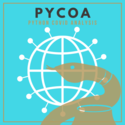

# Using PyCoA : advanced users
[ⓒpycoa.fr](https://pycoa.fr)

## Getting PyCoA, and initialisation

In [ ]:
!pip install --quiet git+https://github.com/coa-project/pycoa.git
# You may experience few errors about datascience, coveralls, pytest versions, but pycoa will work.

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 972kB 11.7MB/s 
     |████████████████████████████████| 10.1MB 17.9MB/s 
     |████████████████████████████████| 6.5MB 41.3MB/s 
     |████████████████████████████████| 245kB 46.9MB/s 
     |████████████████████████████████| 14.8MB 183kB/s 
     |████████████████████████████████| 235kB 48.3MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.3 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.


In [ ]:
import coa.tools as ct
ct._verbose_mode=2 # to get a more verbose output mode

In [ ]:
import coa

In [ ]:
print(coa.__version__, coa.__author__ , coa.__email__ ) # print some informations

1.0 Tristan Beau, Julien Browaeys, Olivier Dadoun support@pycoa.fr


In [ ]:
import coa.front as cf

Init of covid19.DataBase()
Init of GeoManager()
Init of GeoRegion()
JHU aka Johns Hopkins database selected ...
Few information concernant the selected database :  jhu
Available which key-words for:  ['deaths', 'confirmed', 'recovered']
Example of location :  India, Montenegro, Argentina, Mali, Brazil  ...
Last date data  11/19/20
Init of CocoDisplay()
Init of GeoInfo()


## Some plots, with options

In [ ]:
cf.plot(where=['Spain'], which='deaths', what='cumul') # show bugs in data, because the cumulative function is not monotonous increasing

In [ ]:
cf.plot(where=['Spain'], which='deaths', what='cumul',option='nonneg') # show bugs in data, because the cumulative function is not monotonous increasing

In [ ]:
cf.listwhat()

['cumul', 'diff', 'daily', 'weekly', 'date']

In [ ]:
cf.listwhich()

['deaths', 'confirmed', 'recovered']

In [ ]:
cf.plot(where=['G7','Russia','China'],which='recovered',what='daily',option='nonneg') # example of interpret region (G7), which specified, what specified and non neg

## Getting the data value, plot them with another system or plot another computed values

In [ ]:
data_array=cf.get(where='South america',which='deaths',output='array')   # this is a numpy array

In [ ]:
import matplotlib
matplotlib.pyplot.plot(data_array) # plotting using matplotlib a numpy array

In [ ]:
data=cf.get(where='South america',which='deaths',output='pandas')   # this is a numpy array

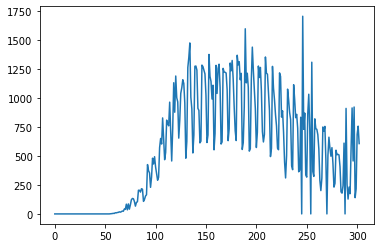

In [ ]:
data[data['where']=='Brazil']['diff'].plot() # using plot pandas.dataframe.plot() function which returns a matplotlib plot

## Now make another normalization of the data

In [ ]:
from coa.geo import GeoInfo as gi
g=gi()

Init of GeoInfo()
Init of GeoManager()
Init of GeoRegion()


In [ ]:
data_bis=g.add_field(input=data,field='population',geofield='where')
data_bis.tail()

,where,date,deaths,cumul,diff,population
3631,Suriname,2020-11-15,114,10080,0,586632
3632,Suriname,2020-11-16,115,10195,1,586632
3633,Suriname,2020-11-17,116,10311,1,586632
3634,Suriname,2020-11-18,116,10427,0,586632
3635,Suriname,2020-11-19,116,10543,0,586632


In [ ]:
data_bis['deaths per 100k pop']=data_bis['cumul']/data_bis['population']*100000

In [ ]:
from bokeh.io import show
fig=cf._cocoplot.pycoa_date_plot(data_bis,input_names_data='cumul',title='deaths')   # use the coa.display module
show(fig)

In [ ]:
fig=cf._cocoplot.pycoa_date_plot(data_bis,input_names_data='deaths per 100k pop',title='deaths per 100k pop') # with normalization
show(fig)

## More about maps

In [ ]:
cf._cocoplot.return_map(data)

In [ ]:
cf._cocoplot.return_map(data_bis,which_data='deaths per 100k pop')   # mapping a specified field

## Exporting the data

In [ ]:
z=cf.get(where=['usa'], what='daily', which='recovered',output='pandas')
z.tail()

,where,date,recovered,cumul,diff
298,United States,2020-11-15,4174884,352258453,26440
299,United States,2020-11-16,4244811,356503264,69927
300,United States,2020-11-17,4293640,360796904,48829
301,United States,2020-11-18,4350789,365147693,57149
302,United States,2020-11-19,4410709,369558402,59920


In [ ]:
z.to_csv('data_from_usa.csv')

In [ ]:
!ls

data_from_usa.csv  sample_data


In [ ]:
# Nota : you will get the data exploring the files (see menu on the left, lower button "Files")